<center><h1>Signal Analyzing</h1></center>

1. Please take some time and think about potential signal components and how to separate them.

2. The goal is to find a model for the given signal that also successfully predicts how it will continue.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
import statistics 
from scipy.fft import fft, ifft
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

ModuleNotFoundError: No module named 'keras'

In [13]:
dataset = pd.read_csv('sample-data.csv')
x = dataset.iloc[:,:-1].values
X = dataset.iloc[:,0].values
y = dataset.iloc[:,-1].values
Y = dataset.iloc[:,1:2].values

In [9]:
def plot_xy(x_data, x_label, y_data, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.plot(x_data,y_data, 'b-')
def plot_x(x_data, x_label):
    plt.xlabel(x_label)
    plt.plot(x_data, 'b-')
def plot_scatter(x_data, x_label, y_data, y_label):
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.scatter(x_data,y_data, color = 'red')

The above figure is our signal or data points.
First, I want to seperate these signals. I have started from regression.

In [16]:
poly_reg = PolynomialFeatures(degree = 2)
x_poly = poly_reg.fit_transform(x)
y_poly = poly_reg.fit(x_poly,y)
regressor = LinearRegression()
regressor.fit(x_poly, y)
y_poly_pred = regressor.predict(x_poly)
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.xlabel('time')
plt.ylabel('data')
plt.show()

ValueError: could not convert string to float: '2013-01-02'

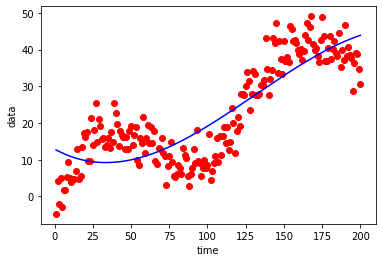

In [340]:
poly_reg = PolynomialFeatures(degree = 3)
x_poly = poly_reg.fit_transform(x)
y_poly = poly_reg.fit(x_poly,y)
regressor = LinearRegression()
regressor.fit(x_poly, y)
y_poly_pred = regressor.predict(x_poly)
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.xlabel('time')
plt.ylabel('data')
plt.show()

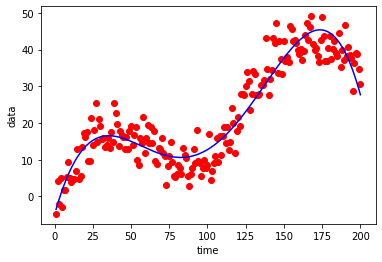

In [349]:
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
y_poly = poly_reg.fit(x_poly,y)
regressor = LinearRegression()
regressor.fit(x_poly, y)
y_poly_pred_4 = regressor.predict(x_poly)
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.xlabel('time')
plt.ylabel('data')
plt.show()

The given data is fit on polinomial regression with degree=4. Now to find the noise I will separate our pridicted values from given valuse.

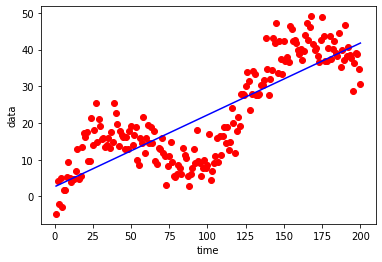

In [350]:
poly_reg = PolynomialFeatures(degree = 1)
x_poly = poly_reg.fit_transform(x)
y_poly = poly_reg.fit(x_poly,y)
regressor = LinearRegression()
regressor.fit(x_poly, y)
y_poly_pred_1 = regressor.predict(x_poly)
plt.scatter(x, y, color = 'red')
plt.plot(x, regressor.predict(x_poly), color = 'blue')
plt.xlabel('time')
plt.ylabel('data')
plt.show()

In above figure, I have found the ramp function by using linear regression.

In [351]:
noise=y-y_poly_pred_4

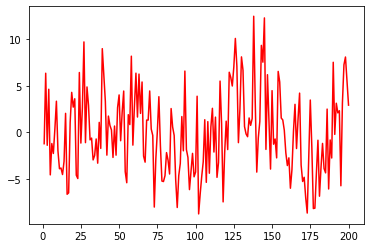

In [352]:
plt.plot(x, noise, color = 'red')

The above figure shows the noise of the signal this is our first signal.

In [354]:
wave=y_poly_pred_4-y_poly_pred_1

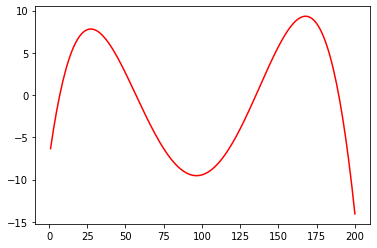

In [355]:
plt.plot(x, wave, color = 'red')

The above figure represent our second signal, which is the outcome of subtracting the output of polinomial degree 4 and the ramp function.

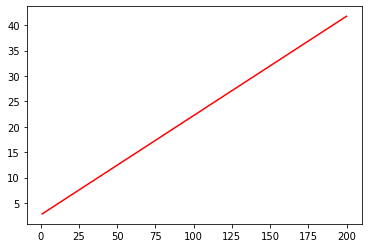

In [356]:
plt.plot(x, y_poly_pred_1, color = 'red')

The above figure provide ramp signal which is our third and the last signal.

In [256]:
y_train=y[:150]
y_test=y[150:]
x_train=x[:150]
x_test=x[150:]

In [257]:
Y_train=Y[:150]
Y_test=Y[150:]
X_train=X[:150]
X_test=X[150:]

Second, we have to develop a model for our dataset. I have used RNN and K-means for predicting new data points.

In [258]:
Y_test.shape

(50, 1)

In [259]:
sc = MinMaxScaler(feature_range = (0, 1))
Y_train = sc.fit_transform(Y_train)

In [260]:
Y_train.shape

(150, 1)

In [280]:
W_train = [] #X_train
z_train = [] #y_train
for i in range(50, 150):
    W_train.append(Y_train[i-50:i, 0])
    z_train.append(Y_train[i, 0])
W_train, z_train = np.array(W_train), np.array(z_train)

In [281]:
W_train = np.reshape(W_train, (W_train.shape[0], W_train.shape[1], 1))

In [282]:
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (W_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'RMSprop', loss = 'mean_squared_error')

In [283]:
regressor.fit(W_train, z_train, epochs = 100, batch_size = 20)

Epoch 1/100
5/5 [==============================] - 0s 87ms/step - loss: 0.6729
Epoch 2/100
5/5 [==============================] - 0s 91ms/step - loss: 0.0543
Epoch 3/100
5/5 [==============================] - 0s 89ms/step - loss: 0.0261
Epoch 4/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0256
Epoch 5/100
5/5 [==============================] - 0s 99ms/step - loss: 0.0225
Epoch 6/100
5/5 [==============================] - 1s 106ms/step - loss: 0.0289
Epoch 7/100
5/5 [==============================] - 0s 97ms/step - loss: 0.0262
Epoch 8/100
5/5 [==============================] - 0s 85ms/step - loss: 0.0198
Epoch 9/100
5/5 [==============================] - 0s 87ms/step - loss: 0.0423
Epoch 10/100
5/5 [==============================] - 0s 86ms/step - loss: 0.0218
Epoch 11/100
5/5 [==============================] - 0s 87ms/step - loss: 0.0196
Epoch 12/100
5/5 [==============================] - 0s 88ms/step - loss: 0.0215
Epoch 13/100
5/5 [==============================

In [284]:
Y_test=np.array(Y_test)
Y=np.array(Y)

In [285]:
Y_test.shape

(50, 1)

In [286]:
Y.shape

(200, 1)

In [287]:
inp= Y[len(Y)-len(Y_test)-50:]

In [288]:
inp.shape

(100, 1)

In [289]:
inp = sc.transform(inp)
W_test = []
for i in range(50, 100):
    W_test.append(inp[i-50:i, 0])
W_test = np.array(W_test)
W_test = np.reshape(W_test, (W_test.shape[0], W_test.shape[1], 1))

In [290]:
predicted = regressor.predict(W_test)
predicted = sc.inverse_transform(predicted)

In [291]:
predicted.shape

(50, 1)

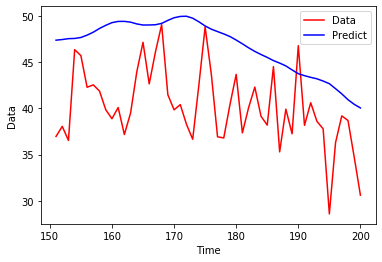

In [292]:
# Visualising the results
#plt.scatter(x,y, color="green")
plt.plot(X_test, Y_test, color = 'red', label = 'Data')
plt.plot(X_test, predicted, color = 'blue', label = 'Predict')
plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()
plt.show()

In [293]:
inputs= Y
inputs = sc.transform(inputs)
print(inputs.shape)

(200, 1)


In [294]:
Wx_test = []
for i in range(50, 200):
    Wx_test.append(inputs[i-50:i, 0])
Wx_test = np.array(Wx_test)
Wx_test = np.reshape(Wx_test, (Wx_test.shape[0], Wx_test.shape[1], 1))

In [295]:
predicted_complete = regressor.predict(Wx_test)
predicted_complete = sc.inverse_transform(predicted_complete)

In [296]:
predicted_complete.shape

(150, 1)

In [297]:
X_pred=X[50:]

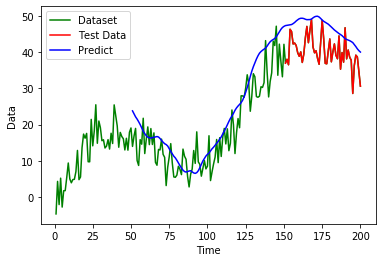

In [298]:
# Visualising the results
plt.plot(x,y, color="green", label = 'Dataset')
plt.plot(X_test, Y_test, color = 'red', label = 'Test Data')
plt.plot(X_pred, predicted_complete, color = 'blue', label = 'Predict')
plt.xlabel('Time')
plt.ylabel('Data')
plt.legend()
plt.show()

The above figure represent our final model for predicting continuity of wave.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [301]:
dataset = pd.read_csv('sample-data.csv')
#x = dataset.iloc[:,:-1].values
#X = dataset.iloc[:,0].values
#y = dataset.iloc[:,-1].values
Y = dataset.iloc[:,[0,1]].values

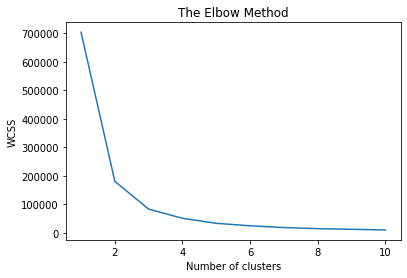

In [302]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(Y)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [31]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(Y)

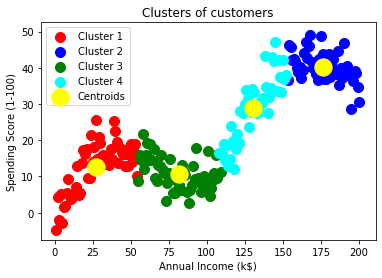

In [34]:
plt.scatter(Y[y_kmeans == 0, 0], Y[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(Y[y_kmeans == 1, 0], Y[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(Y[y_kmeans == 2, 0], Y[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(Y[y_kmeans == 3, 0], Y[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
#plt.scatter(Y[y_kmeans == 4, 0], Y[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In above model can provide the class for new coming points.